# Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

## Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this project, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [24]:
import requests
from bs4 import BeautifulSoup
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
nltk.download()
from nltk.corpus import stopwords
from textblob import TextBlob

# Downloading the required NLTK packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to C:\Users\RAFLY AULYA RIZKY
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RAFLY AULYA RIZKY
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\RAFLY AULYA RIZKY
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\RAFLY AULYA
[nltk_data]     RIZKY N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preprocessing

In [25]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [26]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Food was lousy. Who ever is pl...
1,✅ Trip Verified | Had the worst experience. Th...
2,✅ Trip Verified | The ground staff were not h...
3,✅ Trip Verified | Second time BA Premium Econ...
4,Not Verified | They changed our Flights from ...


In [27]:
# set index
df.index = range(1, len(df)+1)

In [28]:
unnecessary_statement1 = '✅ Trip Verified | '
unnecessary_statement2 = 'Not Verified | '
unnecessary_word3 = '✅ Verified Review | '

df.reviews = df.reviews.apply(lambda x: x.replace(unnecessary_statement1, ''))
df.reviews = df.reviews.apply(lambda x: x.replace(unnecessary_statement2, ''))
df.reviews = df.reviews.apply(lambda x: x.replace(unnecessary_word3, ''))
df

,reviews
1,Food was lousy. Who ever is planning the Asia...
2,Had the worst experience. The flight from Lond...
3,The ground staff were not helpful. Felt like ...
4,Second time BA Premium Economy in a newer air...
5,They changed our Flights from Brussels to Lon...
...,...
996,Delhi to London. Having read many negative re...
997,When you travel British Airways its like you a...
998,British Airways gets plenty of well deserved ...
999,BA First Class is not even that any more. Sta...


## Data Analysis

In [29]:
def analyze_sentiment(reviews):
    tokens = nltk.word_tokenize(reviews)
    
    tagged_tokens = nltk.pos_tag(tokens)

    lemmatized_words = []
    lemmatizer = nltk.WordNetLemmatizer()
    for word, tag in tagged_tokens:
        tag = tag[0].lower() if tag[0].lower() in ['a', 'r', 'n', 'v'] else 'n'
        lemmatized_words.append(lemmatizer.lemmatize(word, tag))

    stopwords = nltk.corpus.stopwords.words('english')
    clean_words = [word for word in lemmatized_words if word.lower() not in stopwords]

    clean_text = ' '.join(clean_words)

    blob = TextBlob(clean_text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, polarity, subjectivity

df[['sentiment', 'polarity', 'subjectivity']] = df['reviews'].apply(analyze_sentiment).apply(pd.Series)

In [30]:
df

,reviews,sentiment,polarity,subjectivity
1,Food was lousy. Who ever is planning the Asia...,Positive,0.006250,0.338333
2,Had the worst experience. The flight from Lond...,Negative,-0.175000,0.600000
3,The ground staff were not helpful. Felt like ...,Positive,0.133333,0.266667
4,Second time BA Premium Economy in a newer air...,Positive,0.402917,0.673333
5,They changed our Flights from Brussels to Lon...,Negative,-0.108333,0.458333
...,...,...,...,...
996,Delhi to London. Having read many negative re...,Positive,0.109375,0.366377
997,When you travel British Airways its like you a...,Positive,0.200570,0.491791
998,British Airways gets plenty of well deserved ...,Positive,0.352273,0.522727
999,BA First Class is not even that any more. Sta...,Positive,0.118074,0.477039


In [31]:
print('Please select which sentiment reviews you want to display')
review_option = input('positive / negative / neutral?\n')

if review_option == 'Positive':
    positive_reviews = df[df['sentiment'] == 'Positive']
    random_review = np.random.choice(positive_reviews['reviews'])
if review_option == 'Negative':
    negative_reviews = df[df['sentiment'] == 'Negative']
    random_review = np.random.choice(negative_reviews['reviews'])
if review_option == 'Neutral':
    neutral_reviews = df[df['sentiment'] == 'Neutral']
    random_review = np.random.choice(neutral_reviews['reviews'])
    
print(random_review)

Please select which sentiment reviews you want to display
positive / negative / neutral?
Positive
 Doha to Paris via London. This is the first time using BA since October 2002, nothing has changed,  the same reversible business class seats with very little storage space still comfortable but the business has caught up with BA and left them behind, with very poor entertainment selection and limited food choice. It cannot compare with other business leaders like Cathay and Qatar Airways but on this route BA charges the same price as Qatar Airways but delivers a much poorer product, though the service was OK not as personal but alright. Where they are better is with their check in luggage policy of 2 bags 32 kgs each they are superior and generous. I will still use them but look forward to them rolling in the new business class.


## Sentiment Analysis

In [32]:
print('Please select which sentiment reviews you want to analyze')
review_option = input('Positive / Negative / Neutral?\n')

sentiment_reviews = df[df['sentiment'] == review_option]
sentiment_reviews = sentiment_reviews['reviews'].tolist()
sentiment_reviews = ' '.join(sentiment_reviews)
text = sentiment_reviews
text

Please select which sentiment reviews you want to analyze
Positive / Negative / Neutral?
Positive


' Food was lousy. Who ever is planning the Asian Hindu Vegetarian meal is clueless as to what this meal includes. The snack was also lousy. It took us 2 hours just to go from T5 to T3 and clear security check. The place was chaotic. We get to our boarding gate and again a long line with 40 minutes wait for someone to check passport and boarding pass. Seats in Premium economy was ok, but when the passenger in front reclines, there is very little space for the window seat passenger to cross over. Overall not a good airline.  The ground staff were not helpful. Felt like all they wanted to do was rush us to check in and then all passengers needed up waiting in a holding area for a bus anyway. Travelling with a child with a disability was a nightmare with British Airways. Logged a complaint and it took almost four weeks to answer. Lost some of our luggage. It was not a good experience.  Second time BA Premium Economy in a newer aircraft and yet another excellent experience. Despite a three 

In [33]:
text = text.lower()
text = re.sub(r'\d+','', text)

In [34]:
text = text.translate(str.maketrans('', '', string.punctuation))
text

' food was lousy who ever is planning the asian hindu vegetarian meal is clueless as to what this meal includes the snack was also lousy it took us  hours just to go from t to t and clear security check the place was chaotic we get to our boarding gate and again a long line with  minutes wait for someone to check passport and boarding pass seats in premium economy was ok but when the passenger in front reclines there is very little space for the window seat passenger to cross over overall not a good airline  the ground staff were not helpful felt like all they wanted to do was rush us to check in and then all passengers needed up waiting in a holding area for a bus anyway travelling with a child with a disability was a nightmare with british airways logged a complaint and it took almost four weeks to answer lost some of our luggage it was not a good experience  second time ba premium economy in a newer aircraft and yet another excellent experience despite a three hour delay and missing

In [35]:
tokens = [word for word in text.split()]

# nltk.download()
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [36]:
freq = nltk.FreqDist(clean_tokens)
for key, val in freq.items():
    print(str(key), ':', str(val))

food : 385
lousy : 3
ever : 38
planning : 7
asian : 6
hindu : 1
vegetarian : 17
meal : 146
clueless : 5
includes : 2
snack : 30
also : 136
took : 108
us : 232
hours : 191
go : 81
clear : 26
security : 61
check : 184
place : 23
chaotic : 5
get : 249
boarding : 204
gate : 102
long : 109
line : 40
minutes : 152
wait : 46
someone : 39
passport : 20
pass : 23
seats : 309
premium : 124
economy : 215
ok : 100
passenger : 49
front : 56
reclines : 3
little : 62
space : 48
window : 35
seat : 376
cross : 2
overall : 91
good : 431
airline : 162
ground : 63
staff : 284
helpful : 66
felt : 51
like : 131
wanted : 29
rush : 7
passengers : 151
needed : 40
waiting : 43
holding : 6
area : 24
bus : 26
anyway : 11
travelling : 35
child : 6
disability : 2
nightmare : 6
british : 264
airways : 261
logged : 5
complaint : 21
almost : 38
four : 10
weeks : 34
answer : 13
lost : 35
luggage : 90
experience : 160
second : 45
time : 382
ba : 847
newer : 4
aircraft : 147
yet : 32
another : 112
excellent : 100
despite

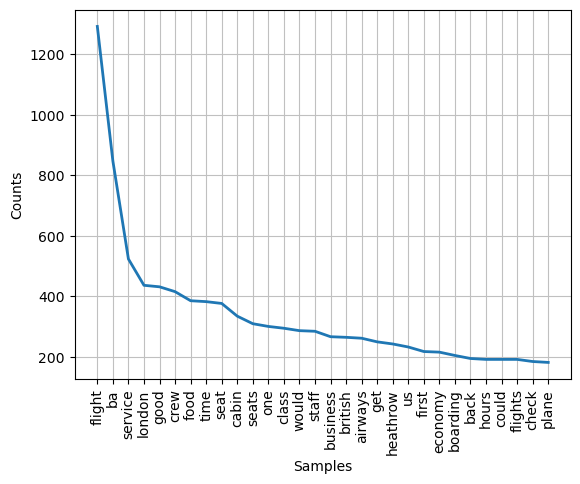

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
freq.plot(30)

In [38]:
print('above is the result of the', review_option, 'sentiment!')

above is the result of the Positive sentiment!


## Data Visualization

In [39]:
total_positive = df['sentiment'] == 'Positive'
total_negative = df['sentiment'] == 'Negative'
total_neutral = df['sentiment'] == 'Neutral'

print('total positive sentiments:', total_positive.sum())
print('total negative sentiments:', total_negative.sum())
print('total neutral sentiments:', total_neutral.sum())

total positive sentiments: 712
total negative sentiments: 276
total neutral sentiments: 12


Text(0.5, 1.0, 'Sentiment across Subjectivity')

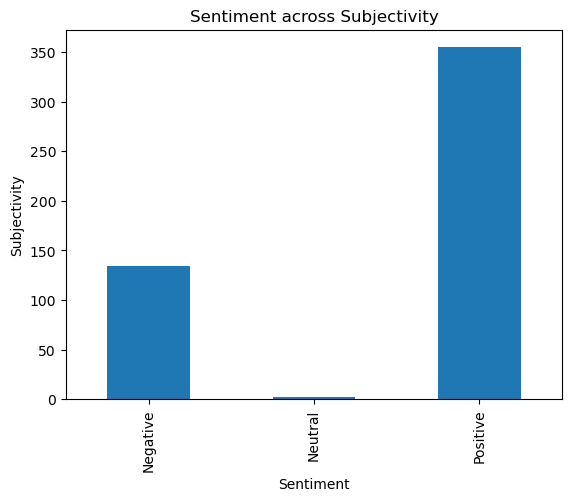

In [40]:
# Visualization of Sentiment across Polarity
# the "Positive" sentiment has the most than the Negative and Neutral

tipe_subjectivity = df.groupby(['sentiment']).sum()['subjectivity']
tipe_subjectivity.plot(kind='bar')
plt.ylabel('Subjectivity')
plt.xlabel('Sentiment')
plt.title('Sentiment across Subjectivity')

[Text(0.5, 0, 'Sentiment'),
 Text(0, 0.5, 'Subjectivity score'),
 Text(0.5, 1.0, 'Box Plot On Sentiment Across Subjectivity')]

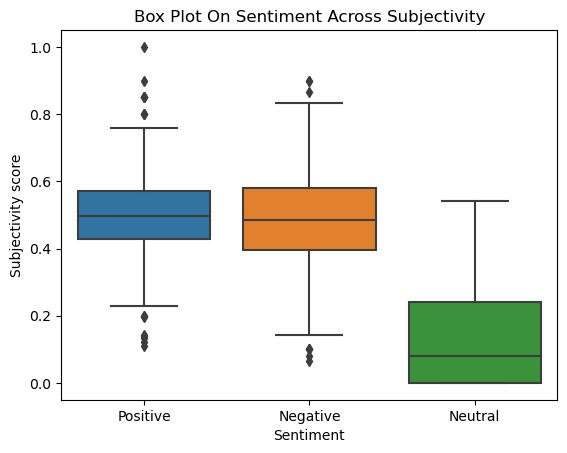

In [41]:
fig,axes = plt.subplots()
sn.boxplot(data=df,y="subjectivity",x="sentiment",orient="v")
axes.set(xlabel='Sentiment', ylabel='Subjectivity score',title="Box Plot On Sentiment Across Subjectivity")


[Text(0.5, 0, 'Sentiment'),
 Text(0, 0.5, 'Polarity score'),
 Text(0.5, 1.0, 'Box Plot On Sentiment Across Polarity')]

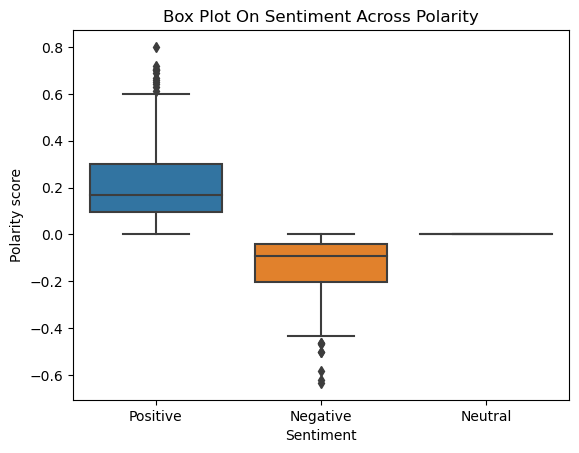

In [42]:
fig,axes = plt.subplots()
sn.boxplot(data=df,y="polarity",x="sentiment",orient="v")
axes.set(xlabel='Sentiment', ylabel='Polarity score',title="Box Plot On Sentiment Across Polarity")

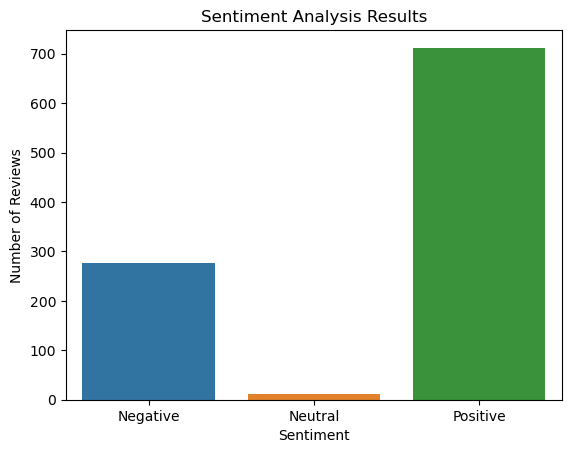

In [43]:
sentiment_counts = df.groupby('sentiment')['reviews'].count()

sn.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

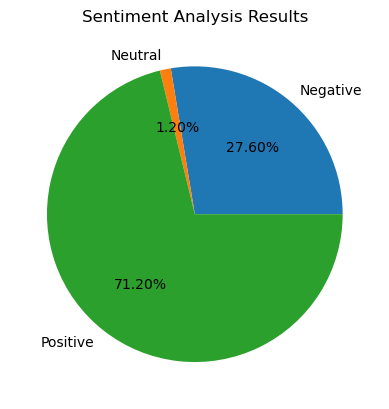

In [44]:
sentiment_counts = df.groupby('sentiment')['reviews'].count()

plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.2f%%')
plt.title('Sentiment Analysis Results')
plt.show()

In [45]:
df

,reviews,sentiment,polarity,subjectivity
1,Food was lousy. Who ever is planning the Asia...,Positive,0.006250,0.338333
2,Had the worst experience. The flight from Lond...,Negative,-0.175000,0.600000
3,The ground staff were not helpful. Felt like ...,Positive,0.133333,0.266667
4,Second time BA Premium Economy in a newer air...,Positive,0.402917,0.673333
5,They changed our Flights from Brussels to Lon...,Negative,-0.108333,0.458333
...,...,...,...,...
996,Delhi to London. Having read many negative re...,Positive,0.109375,0.366377
997,When you travel British Airways its like you a...,Positive,0.200570,0.491791
998,British Airways gets plenty of well deserved ...,Positive,0.352273,0.522727
999,BA First Class is not even that any more. Sta...,Positive,0.118074,0.477039


In [46]:
df.to_csv("data/BA_reviews.csv")